In [0]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=60232fe415b933b13624439d7da1c9e0ddcdb38fc204c374cecccc1c4059efe6
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [0]:
from gensim.models.fasttext import FastText
import wikipedia
from nltk.tokenize import sent_tokenize
import nltk
import re
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
artificial_intelligence = wikipedia.page("Artificial Intelligence").content
machine_learning = wikipedia.page("Machine Learning").content
deep_learning = wikipedia.page("Deep Learning").content
neural_network = wikipedia.page("Neural Network").content

artificial_intelligence = sent_tokenize(artificial_intelligence)
machine_learning = sent_tokenize(machine_learning)
deep_learning = sent_tokenize(deep_learning)
neural_network = sent_tokenize(neural_network)

artificial_intelligence.extend(machine_learning)
artificial_intelligence.extend(deep_learning)
artificial_intelligence.extend(neural_network)

In [0]:
stemmer = WordNetLemmatizer()
en_stop = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [0]:
final_corpus = [preprocess_text(sentence) for sentence in artificial_intelligence if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

In [0]:
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [0]:
%%time
ft_model = FastText(word_tokenized_corpus,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

CPU times: user 1min 36s, sys: 309 ms, total: 1min 36s
Wall time: 49.5 s


In [0]:
print(ft_model.wv['artificial'])

[-6.93367541e-01  2.83478111e-01 -1.62900522e-01 -8.48244205e-02
  2.68914789e-01 -1.23572364e-01  2.14073002e-01  1.30915508e-01
 -1.17327822e-02 -2.70444602e-02  2.17140421e-01 -1.49612516e-01
 -1.02666557e-01  4.82117292e-04 -9.99363139e-02  2.17366382e-01
 -1.54239893e-01  3.92234027e-01  9.24675688e-02  1.36845410e-01
  8.19259167e-01 -1.27596045e-02  3.70263487e-01 -1.44619718e-01
 -2.23112050e-02  2.63136715e-01 -1.34441927e-01  3.15483138e-02
  4.59687054e-01 -8.45307782e-02 -5.89958489e-01  7.79029578e-02
 -8.72005671e-02 -3.85956615e-01  1.50548592e-01  4.19108011e-02
  1.95551798e-01  2.06053063e-01  4.59881276e-01 -2.49770239e-01
 -2.31098726e-01 -3.06699425e-01  6.60044670e-01  2.58928478e-01
  1.49314493e-01 -1.34805128e-01  6.34680763e-02  2.80763328e-01
 -1.06040128e-01  4.90047663e-01  1.26965329e-01  3.06469738e-01
 -1.57193113e-02  2.60562617e-02  2.97178090e-01 -1.02397166e-01
 -1.52239548e-02 -7.45788887e-02 -5.31299822e-02 -4.71852064e-01]


In [0]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'deep']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['intelligence', 'inspired', 'technology', 'topic', 'moral']
intelligence:['artificial', 'human', 'simulation', 'machine', 'simulate']
machine:['learning', 'ethic', 'intelligence', 'concerned', 'ethical']
network:['neural', 'biological', 'recurrent', 'neuron', 'connectionist']
recurrent:['hopfield', 'network', 'rnns', 'deep', 'neural']
deep:['learning', 'convolutional', 'generative', 'recurrent', 'cnns']


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
print(ft_model.wv.similarity(w1='artificial', w2='intelligence'))

0.8539844


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

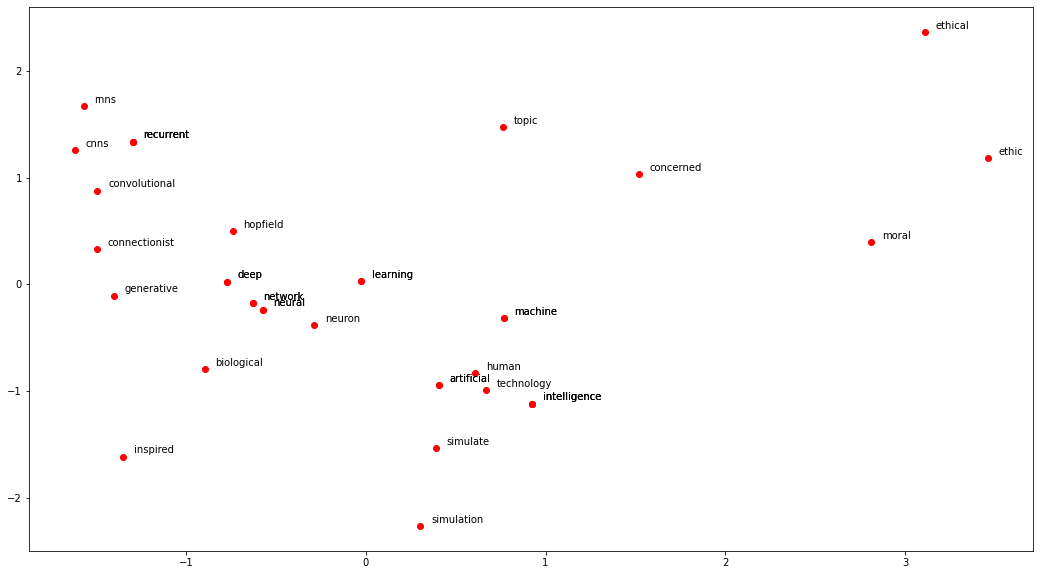

In [0]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')